In [1]:
import torch
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

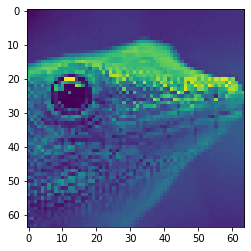

In [33]:
image = Image.open('Gecko.jpg')
f = torch.Tensor(np.asarray(image) / 3).mean(-1)
f = f[::4,::4].contiguous()
plt.imshow(f)

In [13]:
F = torch.fft.fftshift(torch.fft.fft2(f))
print(F.shape)
print(F.dtype)

torch.Size([64, 64])
torch.complex64


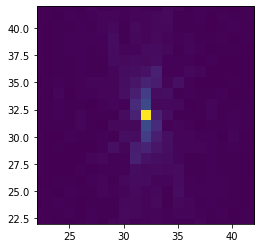

In [14]:
R = F.shape[0]
plt.imshow(torch.abs(F))
plt.xlim([R//2-10,R//2+10])
plt.ylim([R//2-10,R//2+10])
plt.show()

torch.Size([4096, 1])
torch.Size([4096, 2])
torch.Size([4096, 2])
torch.Size([4096, 4096])


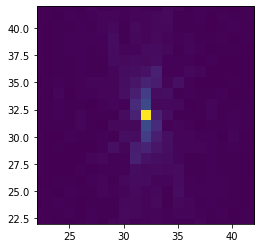

In [85]:
fv = f.view(-1,1)
print(fv.shape)

p = torch.arange(R)
k = torch.stack(torch.meshgrid((p,p))).flatten(1).T
x = torch.stack(torch.meshgrid((p,p))).flatten(1).T
print(k.shape)
print(x.shape)

norm = torch.exp(-1j*2*np.pi*(k @ x.T) / R)
print(norm.shape)

Fv = norm @ torch.complex(fv, torch.zeros_like(fv))
Fv = Fv.reshape(R,R)

plt.imshow(torch.abs(F))
plt.xlim([R//2-10,R//2+10])
plt.ylim([R//2-10,R//2+10])
plt.show()

2048


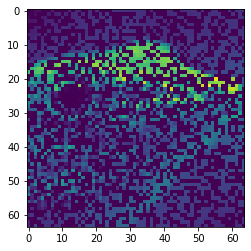

In [120]:
idx, asd = torch.sort(torch.randperm(fv.shape[0])[:R**2//2])

fvD = fv[idx,:]
print(len(idx))

f1 = f.view(-1,1)
f2 = torch.zeros_like(f1)
f2[idx] = f1[idx]
f2 = f2.reshape(R,R)
plt.imshow(f2)

1024
torch.Size([4096, 2])
torch.Size([4096, 2])
torch.Size([1024, 2])


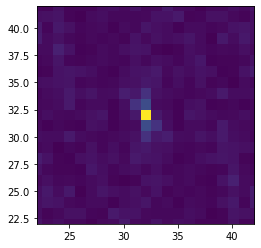

In [123]:
idx, asd = torch.sort(torch.randperm(fv.shape[0])[:R**2//4])
print(len(idx))

f1 = f.view(-1,1)
f2 = torch.zeros_like(f1)
f2[idx] = f1[idx]
f2 = f2.reshape(R,R)
plt.imshow(f2)

p = torch.arange(R)
k = torch.stack(torch.meshgrid((p,p))).flatten(1).T
x = torch.stack(torch.meshgrid((p,p))).flatten(1).T
xD = x[idx]
fvD = fv[idx,:]

print(k.shape)
print(x.shape)
print(xD.shape)

norm = torch.exp(-1j*2*np.pi*(k @ xD.T) / R)
norm = torch.pinverse(norm.T)

FvD = norm @ torch.complex(fvD, torch.zeros_like(fvD))
FvD = torch.fft.fftshift(FvD.reshape(R,R))

plt.imshow(torch.abs(FvD))
plt.xlim([R//2-10,R//2+10])
plt.ylim([R//2-10,R//2+10])
plt.show()